# Problem statement - Mobile Price Range Prediction 

# Analytic approach - Classification

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [63]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [64]:
df = pd.read_csv("D:Dataset/mobile_price.csv")

In [65]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [66]:
df.shape

(2000, 21)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [68]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data cleaning

## No missing values

In [69]:
df1 = df.copy()

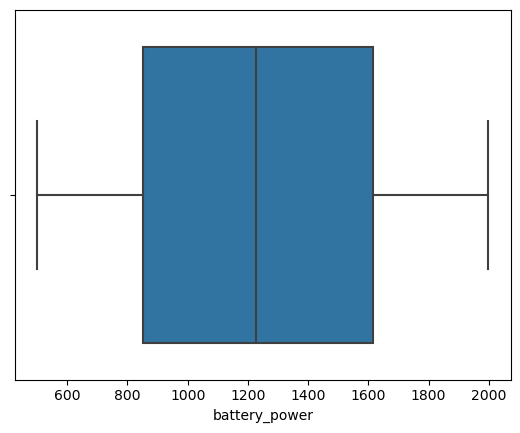

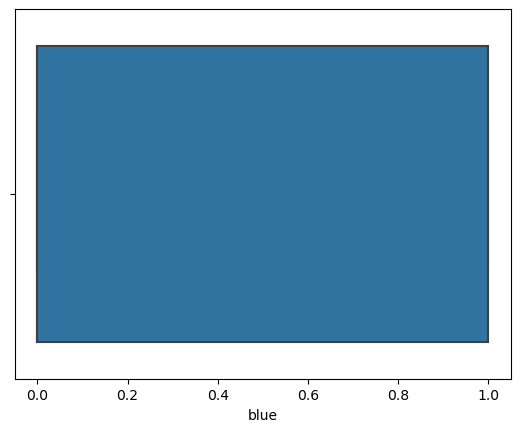

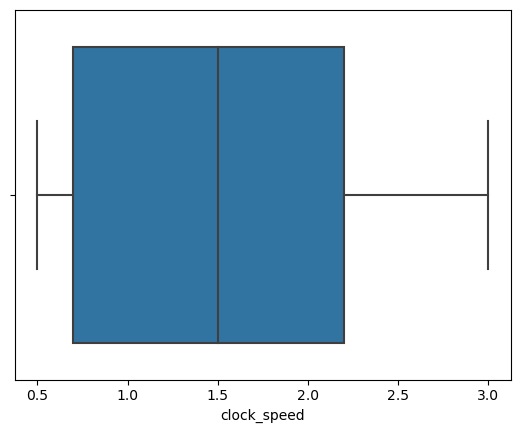

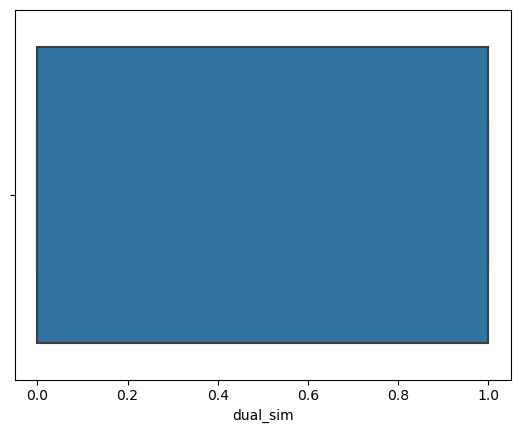

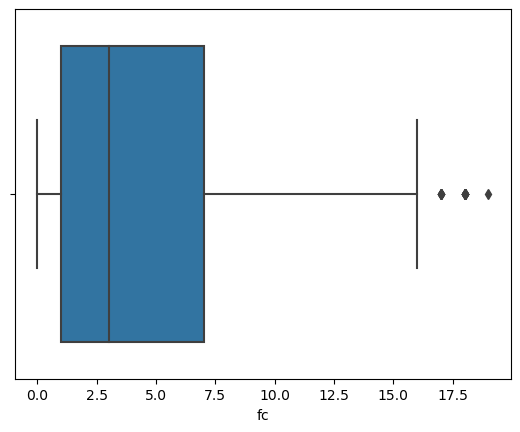

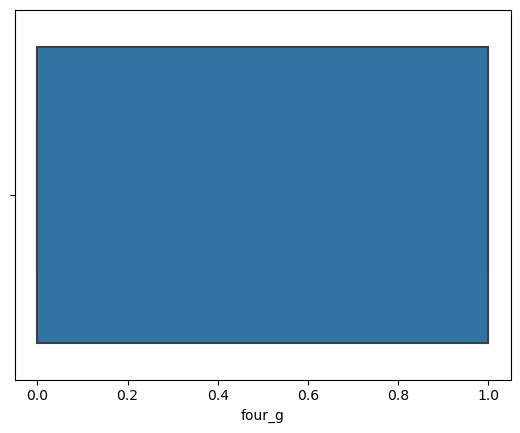

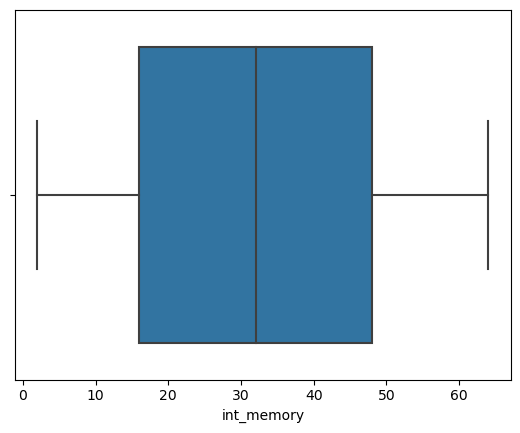

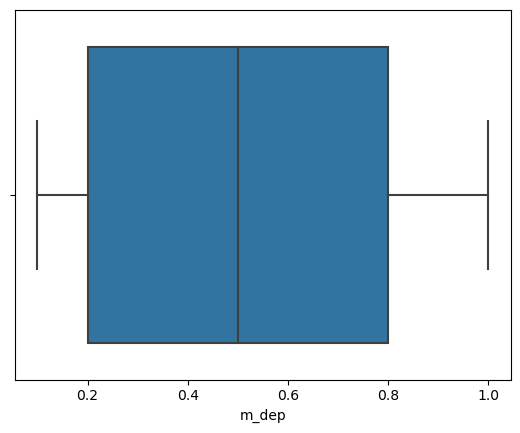

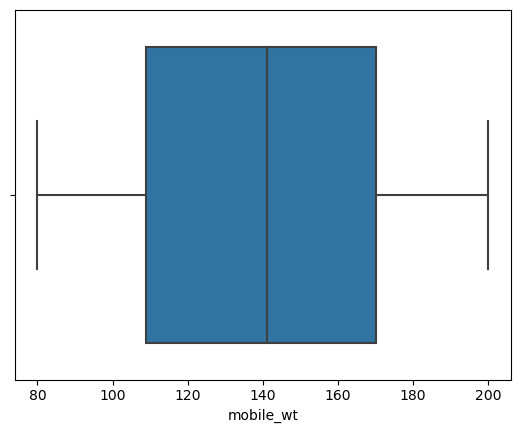

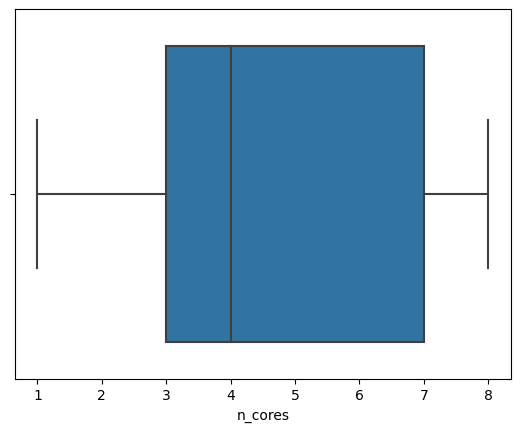

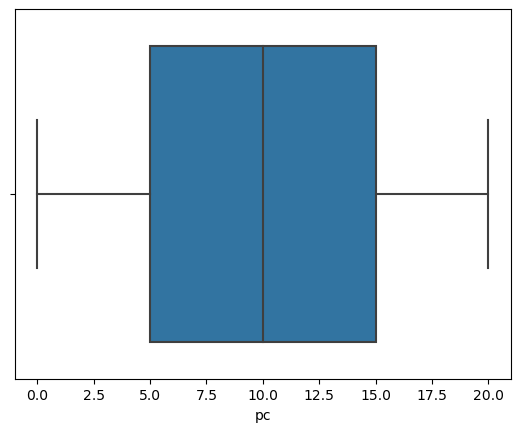

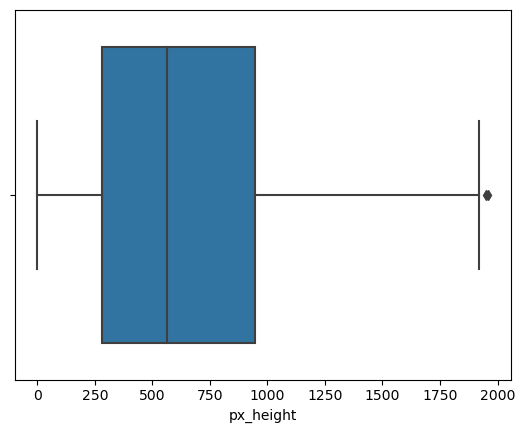

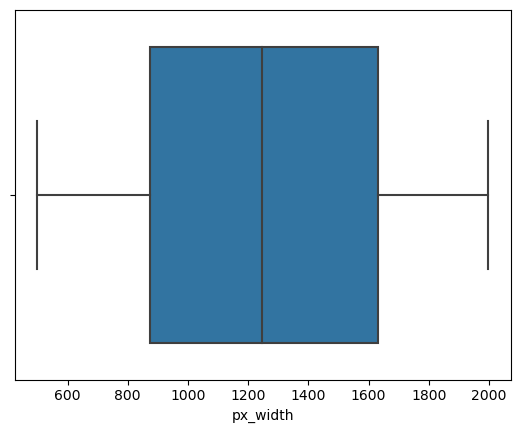

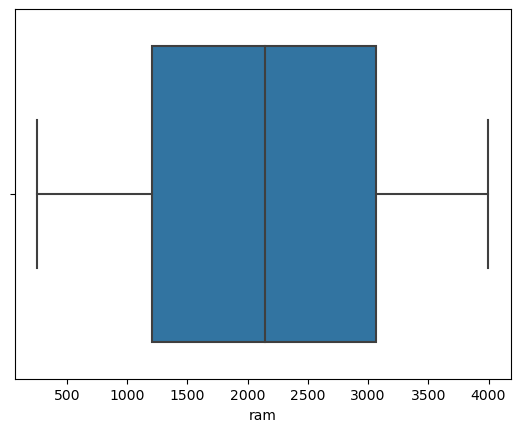

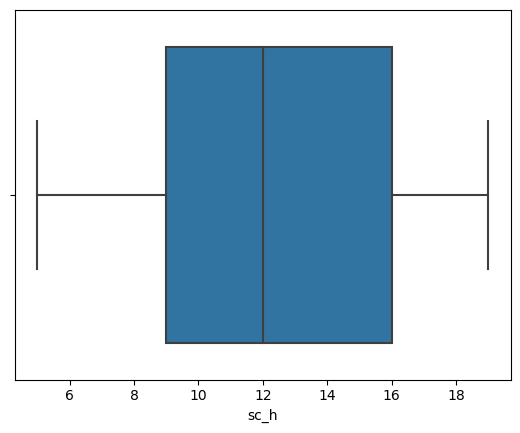

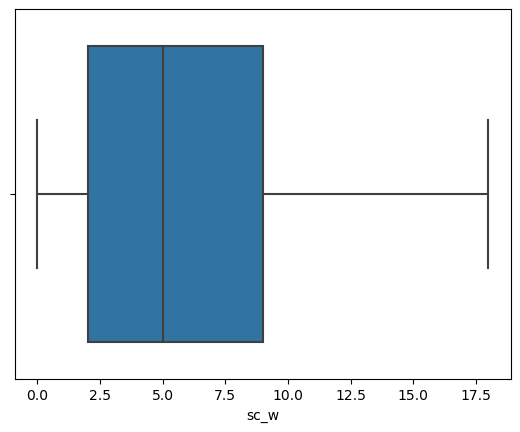

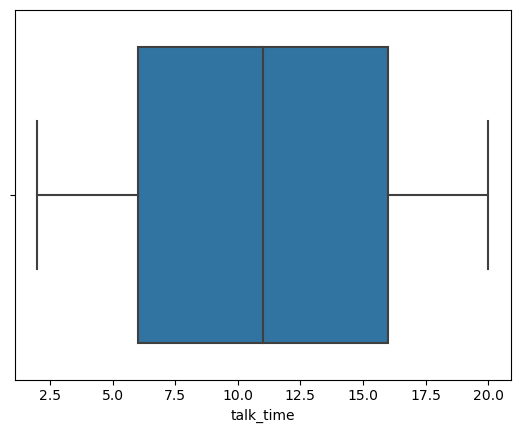

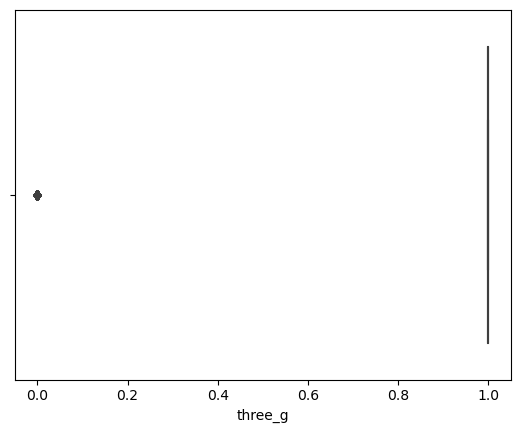

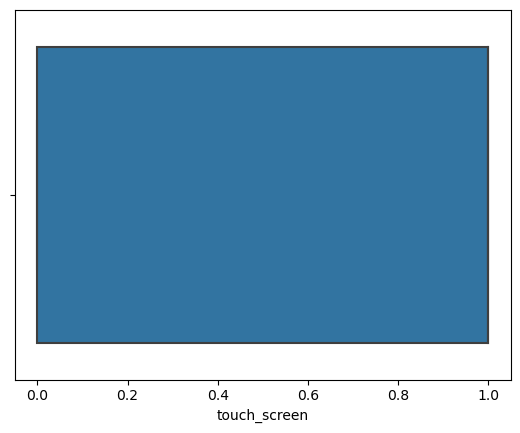

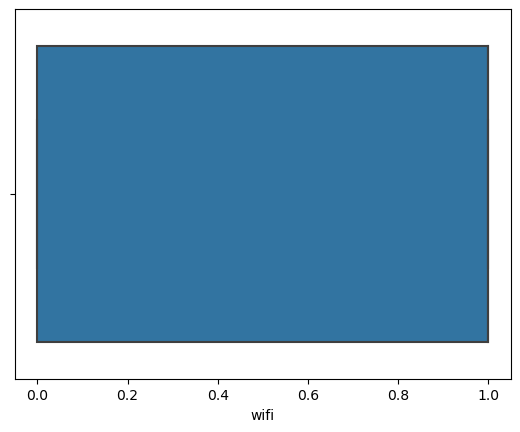

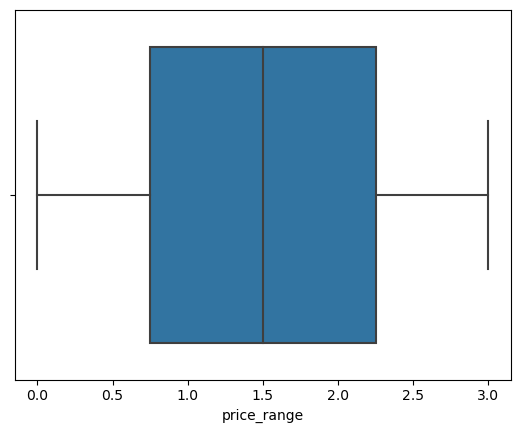

<Figure size 640x480 with 0 Axes>

In [70]:
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.figure()

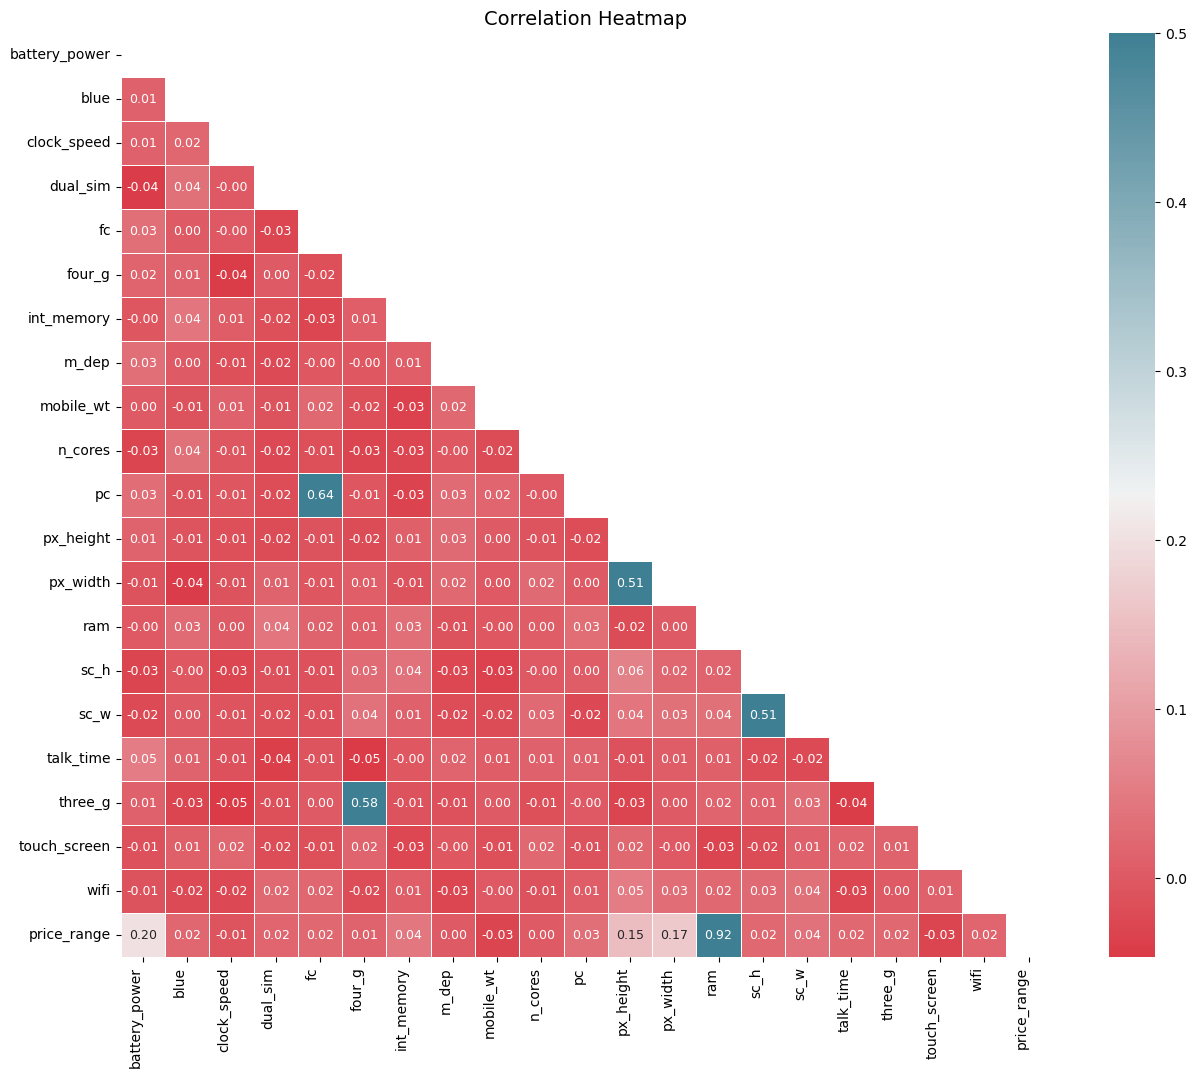

In [71]:
plt.figure(figsize=(15, 12))  # Set the figure size
colormap = sns.diverging_palette(10, 220, as_cmap = True)

# Create a mask for the upper triangle
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap=colormap, annot=True, fmt=".2f", linewidths=0.5, vmax=0.5, annot_kws={'fontsize':9})
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.show()

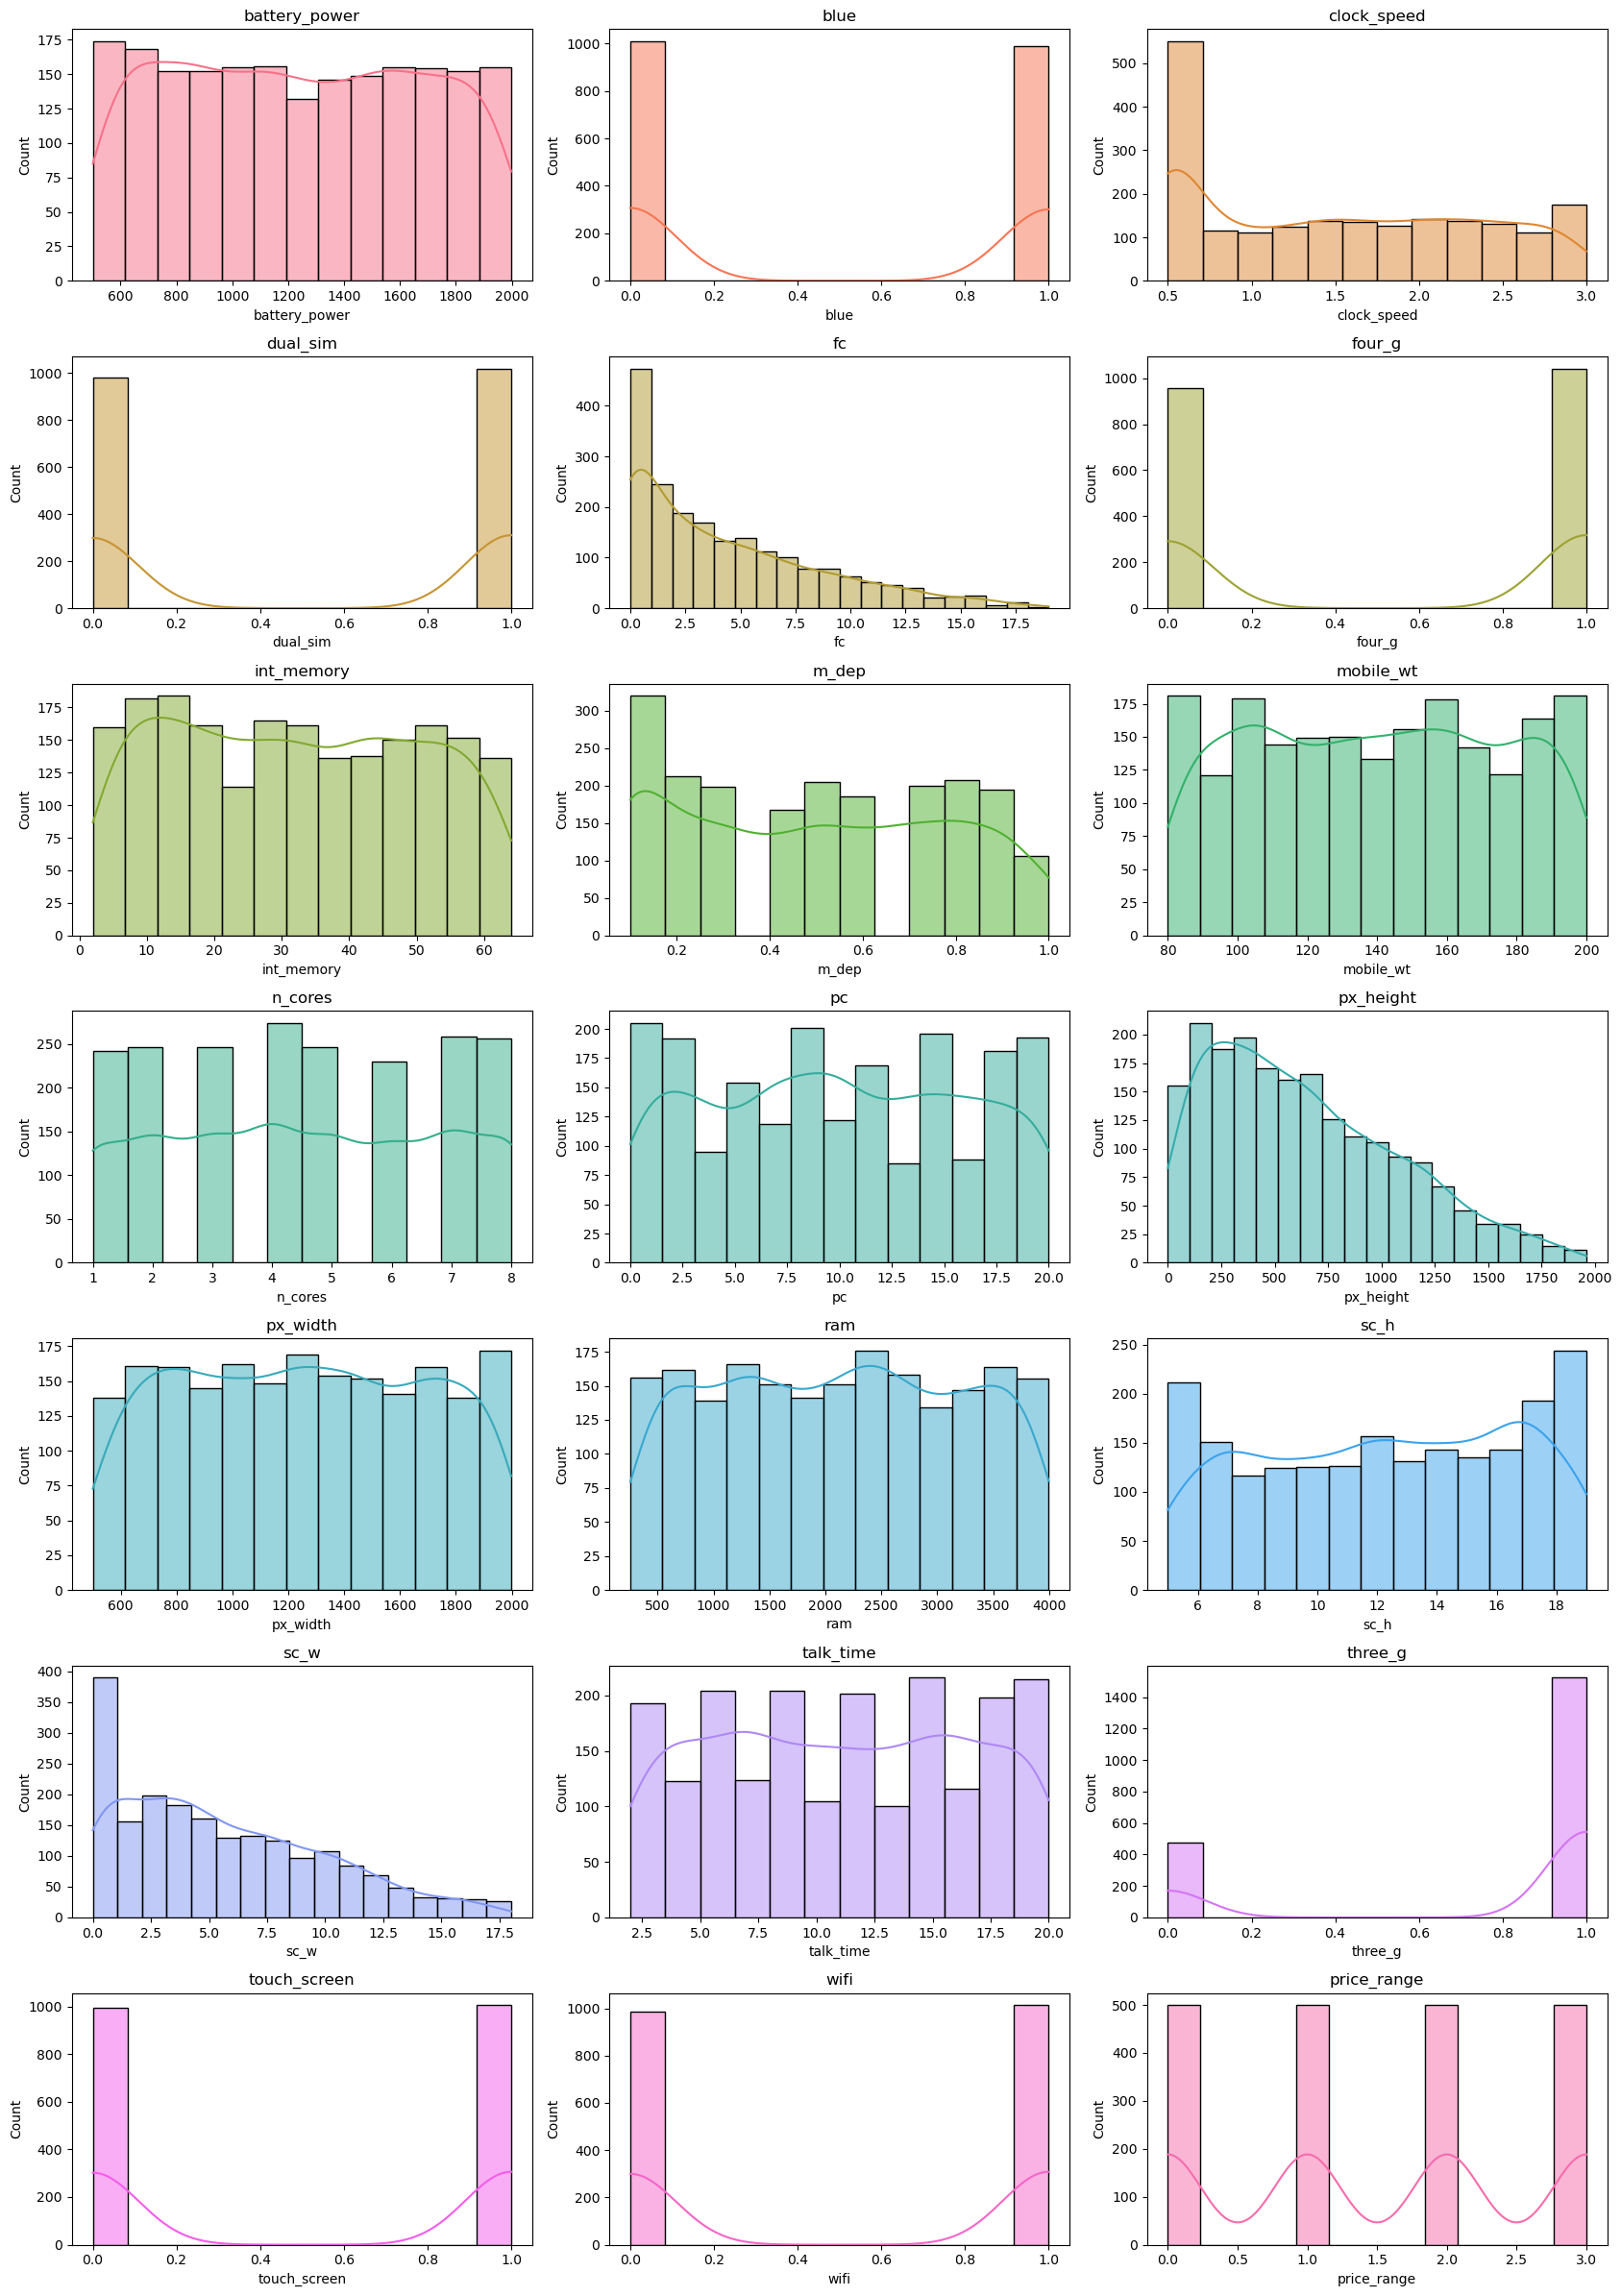

In [72]:
num_columns = df.shape[1]
num_rows = 7
num_cols = (num_columns + num_rows - 1) // num_rows

# Define a list of colors
colors = sns.color_palette('husl', num_columns)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(17, 24))

for i, column in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df, x=column, kde=True, color=colors[i], line_kws={'color': 'black'}, ax=ax)
    ax.set_title(column)


# Remove empty subplots
if num_columns < num_rows * num_cols:
    for j in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

In [73]:
for i in df.columns:
    print(i,'-',df[i].unique())

battery_power - [ 842 1021  563 ... 1139 1467  858]
blue - [0 1]
clock_speed - [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim - [0 1]
fc - [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g - [0 1]
int_memory - [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep - [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt - [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 

In [13]:
sns.pairplot(df,diag_kind='kde',hue='price_range')


KeyboardInterrupt



Error in callback <function flush_figures at 0x000001EE6F0A9820> (for post_execute):



KeyboardInterrupt



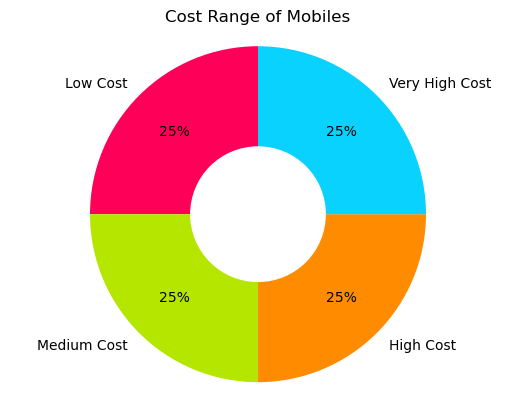

In [74]:
freq = df['price_range'].value_counts()
counts = freq.to_list()
colors=["#ff0059","#b4e600","#ff8c00","#0ad2ff"]
plt.pie(x=counts,labels=['Low Cost','Medium Cost','High Cost','Very High Cost'],autopct='%1.0f%%',colors=colors,startangle=90, pctdistance=0.70)
circle = plt.Circle(xy=(0,0),radius=0.4,color='white')
plt.gcf()
plt.gca().add_artist(circle)
plt.axis('equal')
plt.title("Cost Range of Mobiles")
plt.show()

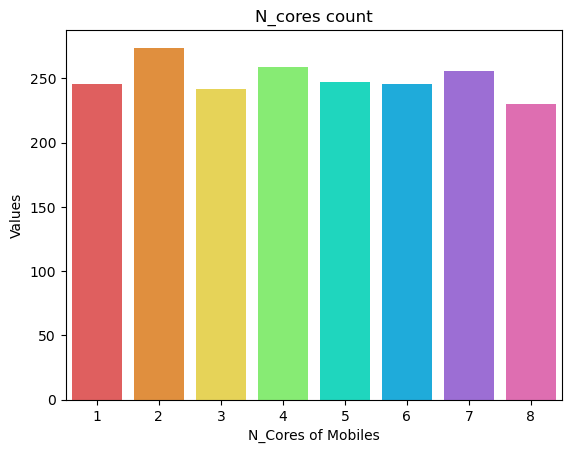

In [75]:
colors=["#f44a4a","#fb8f23","#fee440","#7aff60","#00f5d4","#00bbf9","#9b5de5","#f15bb5"]
sns.barplot(x=df['n_cores'], y=df['n_cores'].value_counts(),palette=colors)
plt.xlabel('N_Cores of Mobiles')
plt.ylabel('Values')
plt.title('N_cores count')
plt.show()

# Standardization

In [76]:
std = StandardScaler()
std

StandardScaler()

In [77]:
df1 = df.copy()

In [78]:
cols = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

for i in cols:
    df1[i] = std.fit_transform(df1[[i]])

# Model building

# SVM

In [79]:
X = df.drop('price_range',axis=1)
y=df['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [80]:
model_1 =SVC()
model_1.fit(X_train,y_train)

SVC()

In [81]:
model_1.score(X_train,y_train)

0.9507142857142857

In [82]:
model_1.score(X_test,y_test)

0.9483333333333334

In [83]:
prediction1 = model_1.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

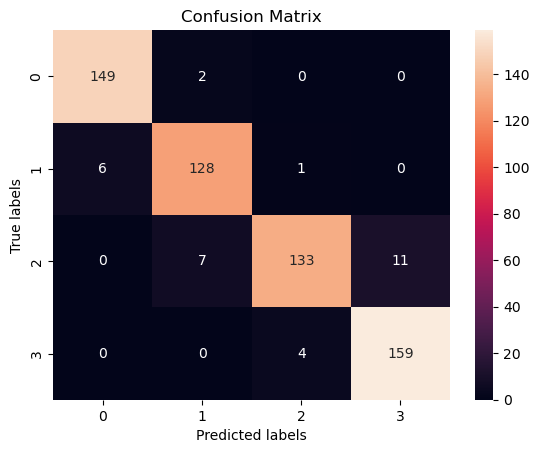

In [84]:
cm = confusion_matrix(y_test, prediction1)


sns.heatmap(cm, annot=True, fmt="d")


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [85]:
model_1 =SVC(C=0.2,gamma='auto')
model_1.fit(X_train,y_train)

SVC(C=0.2, gamma='auto')

In [86]:
model_1.score(X_train,y_train)

0.26071428571428573

In [87]:
model_1.score(X_test,y_test)

0.225

In [88]:
model_1 =SVC(C=0.3,gamma=20.4)
model_1.fit(X_train,y_train)

SVC(C=0.3, gamma=20.4)

In [89]:
model_1.score(X_train,y_train)

0.26071428571428573

In [90]:
model_1.score(X_test,y_test)

0.225

In [91]:
model_1 =SVC(kernel='sigmoid',C=0.8)
model_1.fit(X_train,y_train)

SVC(C=0.8, kernel='sigmoid')

In [92]:
model_1.score(X_train,y_train)

0.19

In [93]:
model_1.score(X_test,y_test)

0.21666666666666667

# Logistic Regression

In [94]:
model_2 = LogisticRegression()
model_2.fit(X_train,y_train)

LogisticRegression()

In [95]:
model_2.score(X_train,y_train)

0.6364285714285715

In [96]:
model_2.score(X_test,y_test)

0.63

In [97]:
prediction2 = model_2.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

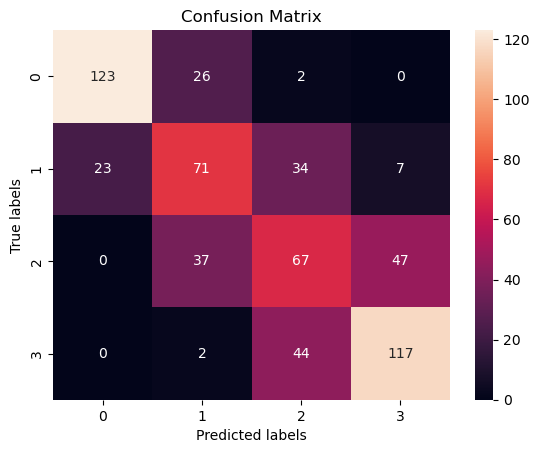

In [98]:
cm = confusion_matrix(y_test, prediction2)


sns.heatmap(cm, annot=True, fmt="d")


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Navies Bayes

In [99]:
model_3 = GaussianNB()
model_3.fit(X_train,y_train)

GaussianNB()

In [100]:
model_3.score(X_train,y_train)

0.8128571428571428

In [101]:
model_3.score(X_test,y_test)

0.8283333333333334

In [102]:
prediction3 = model_3.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

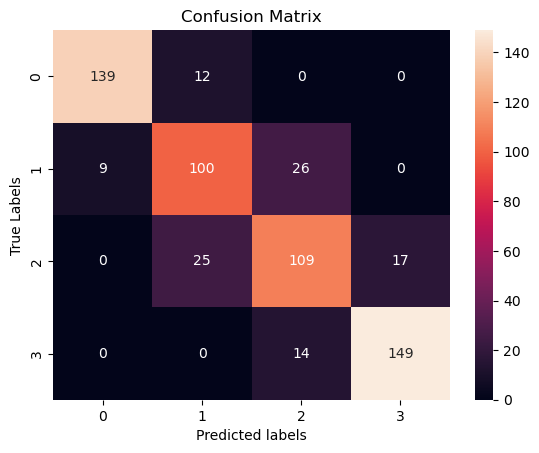

In [103]:
cm = confusion_matrix(y_test,prediction3)

sns.heatmap(cm,annot=True,fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [104]:
model_3 = GaussianNB(priors=[0.2,0.3,0.2,0.3])
model_3.fit(X_train,y_train)

GaussianNB(priors=[0.2, 0.3, 0.2, 0.3])

In [105]:
model_3.score(X_train,y_train)

0.8121428571428572

In [106]:
model_3.score(X_test,y_test)

0.8033333333333333

# KNN

In [107]:
model_4 = KNeighborsClassifier()
model_4.fit(X_train,y_train)

In [108]:
model_4.score(X_train,y_train)

0.9442857142857143

In [109]:
model_4.score(X_test,y_test)

0.925

In [110]:
prediction4 = model_4.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

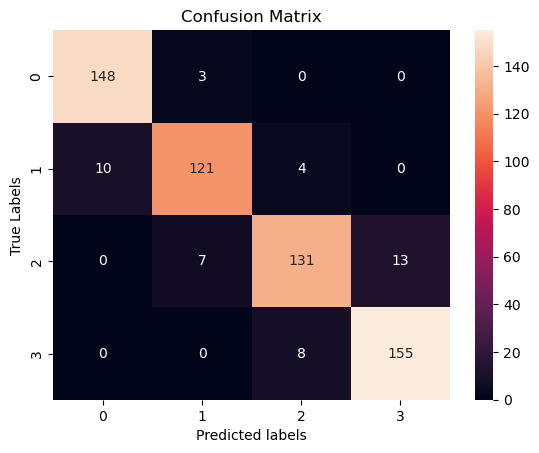

In [111]:
cm = confusion_matrix(y_test,prediction4)

sns.heatmap(cm,annot=True,fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Classification reports of all model

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       151
           1       0.93      0.95      0.94       135
           2       0.96      0.88      0.92       151
           3       0.94      0.98      0.95       163

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [113]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       151
           1       0.52      0.53      0.52       135
           2       0.46      0.44      0.45       151
           3       0.68      0.72      0.70       163

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



In [114]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       151
           1       0.73      0.74      0.74       135
           2       0.73      0.72      0.73       151
           3       0.90      0.91      0.91       163

    accuracy                           0.83       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.83      0.83      0.83       600



In [115]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       151
           1       0.92      0.90      0.91       135
           2       0.92      0.87      0.89       151
           3       0.92      0.95      0.94       163

    accuracy                           0.93       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.93      0.92       600



In [119]:
pred = [prediction1 ,prediction2,prediction3,prediction4 ]

for i in pred:
    cm = confusion_matrix(y_test,pred)

    sns.heatmap(cm,annot=True,fmt='d')

    plt.xlabel('Predicted labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

ValueError: Found input variables with inconsistent numbers of samples: [600, 4]

NameError: name 'n_samples' is not defined

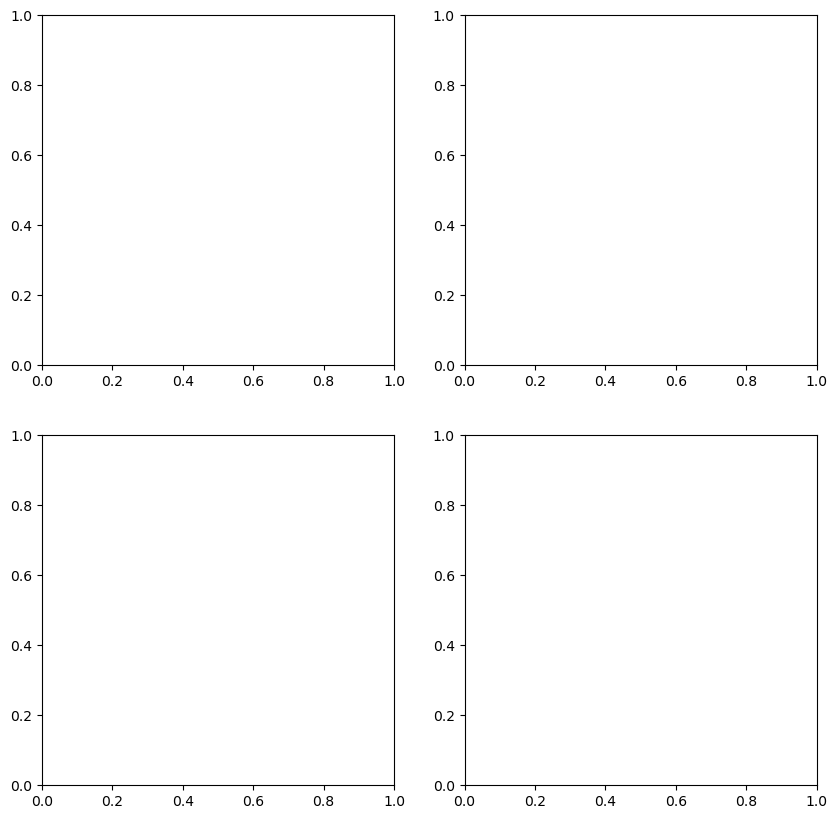

In [120]:
# Assuming you have the predictions stored in variables prediction1, prediction2, prediction3, and prediction4
predictions = [prediction1, prediction2, prediction3, prediction4]

# Assuming you have the y_test data stored in a variable called y_test

# Assuming the shape of y_test is (n_samples,)

# Creating subplots for heatmaps
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Iterating through predictions and plotting heatmaps
for i, prediction in enumerate(predictions):
    row = i // 2  # Calculating the row index
    col = i % 2   # Calculating the column index

    # Assuming the shape of prediction is (n_samples,)
    heatmap_data = np.reshape(prediction, (n_samples, 1))  # Reshaping prediction for heatmap

    # Creating the heatmap
    heatmap = axes[row, col].imshow(heatmap_data, cmap='hot')

    # Setting the plot title
    axes[row, col].set_title("Prediction {}".format(i+1))

# Adding colorbar
cbar = fig.colorbar(heatmap, ax=axes.ravel().tolist(), orientation='horizontal')

# Setting the overall title
plt.suptitle("Heatmaps of Predictions")

# Displaying the plot
plt.show()